# Fiche TP3 : Training a CNN From Scratch

## Load the cifar-10 dataset and perform pre-processing: data normalization and data augmentation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.activations import linear, relu, softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization


### A- Load the cifar-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 29s 0us/step


In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


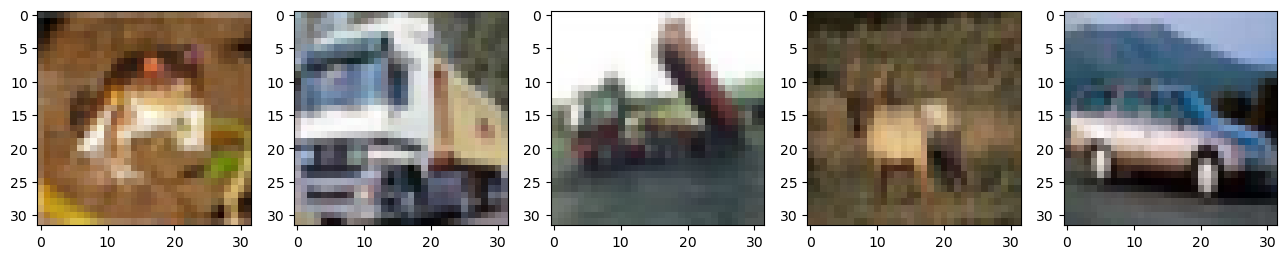

In [4]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = x_train[i]
    axarr[i].imshow(img)
plt.show()

### B- Data Normalization

In [5]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [6]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (50000, 3072)
y_train: (50000, 1)
x_test:  (10000, 3072)
y_test:  (10000, 1)


In [7]:
x_train=x_train/255
x_test=x_test/255

### C- Split the train set into training and validation sets, with a 20% validation set. 

In [8]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_cv: ' + str(x_cv.shape))
print('y_cv: ' + str(y_cv.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (40000, 3072)
y_train: (40000, 1)
x_cv: (10000, 3072)
y_cv: (10000, 1)
x_test:  (10000, 3072)
y_test:  (10000, 1)


### D- Data Augementation

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation between 0 and 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False  # Do not flip images vertically
)

nbr_training_samples = x_train.shape[0]

# Fit ImageDataGenerator on training data
X_fit = x_train.reshape((nbr_training_samples,32,32,3))

datagen.fit(X_fit)

X_aug = np.zeros((2000,32,32,3))
y_aug = np.zeros((2000,1))

i = 0
for X_batch, y_batch in datagen.flow(X_fit,y_train, shuffle=True):
    for j in range(4):
        X_aug[i] = X_batch[j]
        y_aug[i] = y_batch[j]
        i += 1
    if i >= 2000:
        break

In [17]:
pd.DataFrame()
# Concatenate original and augmented data and labels
X_train = np.concatenate((x_train, X_aug.reshape(-1,32*32*3)), axis=0)
y_train = np.concatenate((y_train, y_aug.reshape(-1, 1)), axis=0)

In [18]:
X_train.shape # 2000 images has been add

(42000, 3072)

## 2- Create a convolutional neural network via Keras

### A- Model Creation

In [21]:

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

### B- Compile

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
X_ = X_train.reshape(-1,32,32,3)
X_v = x_cv.reshape(-1,32,32,3)

### C- Fit the Model

In [26]:
model.fit(X_,to_categorical(y_train),
          steps_per_epoch=len(X_) / 64, 
          epochs=5, 
          validation_data=(X_v, to_categorical(y_cv)))

Epoch 1/5


656/656 [==============================] - 24s 32ms/step - loss: 1.6652 - accuracy: 0.3947 - val_loss: 1.4485 - val_accuracy: 0.4780
Epoch 2/5
656/656 [==============================] - 20s 30ms/step - loss: 1.3472 - accuracy: 0.5184 - val_loss: 1.2496 - val_accuracy: 0.5600
Epoch 3/5
656/656 [==============================] - 24s 37ms/step - loss: 1.2220 - accuracy: 0.5704 - val_loss: 1.1659 - val_accuracy: 0.5911
Epoch 4/5
656/656 [==============================] - 33s 50ms/step - loss: 1.1205 - accuracy: 0.6075 - val_loss: 1.0914 - val_accuracy: 0.6139
Epoch 5/5
656/656 [==============================] - 29s 44ms/step - loss: 1.0314 - accuracy: 0.6432 - val_loss: 1.0284 - val_accuracy: 0.6432


### D- Model Evalution

In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test.reshape(-1,32,32,3), to_categorical(y_test))

# Print the test accuracy
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 1.0340 - accuracy: 0.6397
Test accuracy: 0.6396999955177307


## 3- Improving CNN: try to fit another convolutional neural network that can achieve 70% accuracy on the test set (with only 5 epochs).

### A- Model Creation

In [2]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

### B- Compile the model


In [30]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### C- Fit the model

In [31]:
history = model1.fit(X_,to_categorical(y_train),
          steps_per_epoch=len(X_train.reshape(-1,32*32*3)) / 64, 
          epochs=5, 
          validation_data=(X_v, to_categorical(y_cv)))

for i in range(5):
    print(f"Epoch {i+1}:")
    print(f"Train set: Loss = {history.history['loss'][i]}, Accuracy = {history.history['accuracy'][i]}")
    print(f"Validation set: Loss = {history.history['val_loss'][i]}, Accuracy = {history.history['val_accuracy'][i]}")

Epoch 1/5
656/656 [==============================] - 199s 291ms/step - loss: 1.8725 - accuracy: 0.4225 - val_loss: 1.4432 - val_accuracy: 0.4969
Epoch 2/5
656/656 [==============================] - 201s 307ms/step - loss: 1.2042 - accuracy: 0.5972 - val_loss: 1.0356 - val_accuracy: 0.6525
Epoch 3/5
656/656 [==============================] - 193s 294ms/step - loss: 0.9582 - accuracy: 0.6734 - val_loss: 0.8547 - val_accuracy: 0.7003
Epoch 4/5
656/656 [==============================] - 210s 320ms/step - loss: 0.8208 - accuracy: 0.7149 - val_loss: 0.7853 - val_accuracy: 0.7238
Epoch 5/5
656/656 [==============================] - 204s 311ms/step - loss: 0.7427 - accuracy: 0.7419 - val_loss: 0.7830 - val_accuracy: 0.7293
Epoch 1:
Train set: Loss = 1.8725204467773438, Accuracy = 0.4225237965583801
Validation set: Loss = 1.4432390928268433, Accuracy = 0.4968999922275543
Epoch 2:
Train set: Loss = 1.2041728496551514, Accuracy = 0.5972142815589905
Validation set: Loss = 1.0355651378631592, Accur

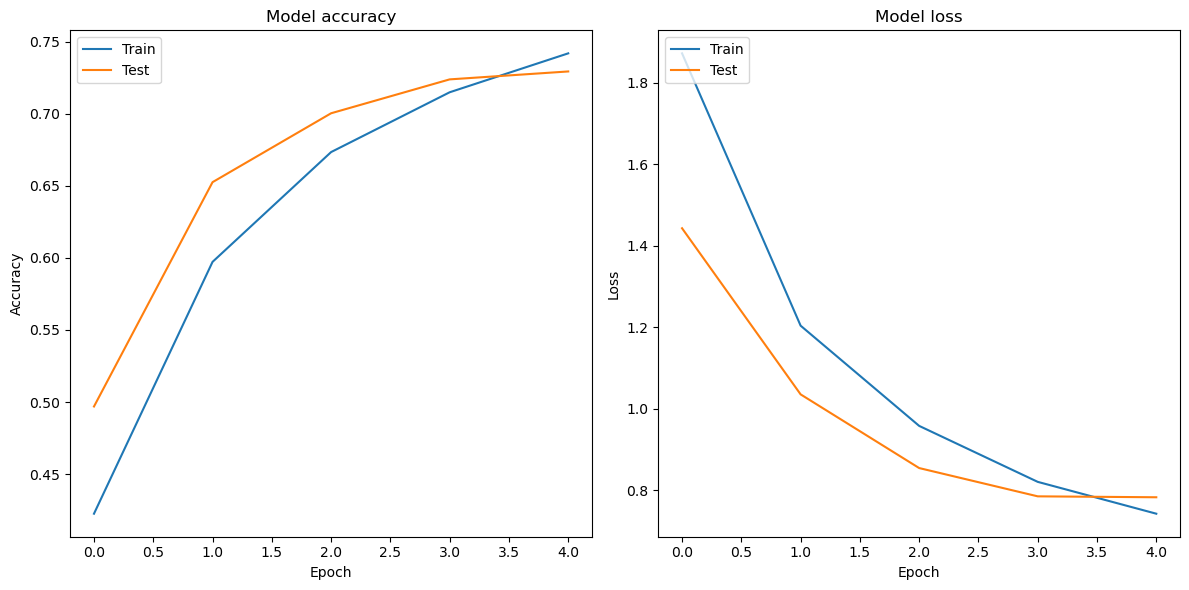

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### D- Model Evaluation

In [39]:
test_loss, test_acc = model1.evaluate(x_test.reshape(-1,32,32,3), to_categorical(y_test))

print('Test accuracy:', test_acc)

313/313 [==============================] - 10s 32ms/step - loss: 0.7260 - accuracy: 0.7478
Test accuracy: 0.7477999925613403
